In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy as sc
from scipy.stats import ttest_ind
import math

In [4]:
stats_against_1314 = pd.read_csv("./preprocessed/opp_stats1314.csv", sep = ',')
stats_against_1415 = pd.read_csv("./preprocessed/opp_stats1415.csv", sep = ',')
stats_against_1516 = pd.read_csv("./preprocessed/opp_stats1516.csv", sep = ',')
stats_against_1617 = pd.read_csv("./preprocessed/opp_stats1617.csv", sep = ',')
stats_against_1718 = pd.read_csv("./preprocessed/opp_stats1718.csv", sep = ',')

stats_for_1314 = pd.read_csv("./preprocessed/team_stats1314.csv", sep = ',')
stats_for_1415 = pd.read_csv("./preprocessed/team_stats1415.csv", sep = ',')
stats_for_1516 = pd.read_csv("./preprocessed/team_stats1516.csv", sep = ',')
stats_for_1617 = pd.read_csv("./preprocessed/team_stats1617.csv", sep = ',')
stats_for_1718 = pd.read_csv("./preprocessed/team_stats1718.csv", sep = ',')

In [7]:
stats_against_1314

,Unnamed: 0,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,Chicago_Bulls*,82.0,243.0,35.0,81.2,0.430,6.6,18.7,0.351,...,0.753,10.7,30.6,41.3,19.6,7.6,6.0,14.4,20.9,91.8
1,1,Indiana_Pacers*,82.0,241.2,34.8,82.7,0.420,6.6,19.0,0.345,...,0.755,10.4,30.7,41.2,18.6,7.2,4.6,13.7,21.9,92.3
2,2,Memphis_Grizzlies*,82.0,241.5,35.7,79.3,0.450,7.5,21.1,0.355,...,0.766,9.9,29.3,39.2,19.9,7.2,5.0,14.2,18.9,94.6
3,3,Charlotte_Bobcats*,82.0,242.7,36.9,83.4,0.442,8.1,22.0,0.369,...,0.759,9.6,33.7,43.3,21.0,6.3,5.1,13.3,20.9,97.1
4,4,Miami_Heat*,82.0,242.4,36.1,79.0,0.457,8.5,23.4,0.362,...,0.750,10.8,29.5,40.3,21.4,8.1,3.1,16.7,20.4,97.4
5,5,San_Antonio_Spurs*,82.0,240.9,37.8,85.1,0.444,6.5,18.3,0.353,...,0.760,10.5,31.7,42.2,20.4,7.7,4.6,13.9,19.3,97.6
6,6,Toronto_Raptors*,82.0,243.4,36.1,80.2,0.450,6.9,19.2,0.360,...,0.752,10.4,30.5,41.0,21.0,7.3,4.3,14.9,22.1,98.0
7,7,Washington_Wizards*,82.0,244.6,37.0,80.9,0.458,7.5,21.5,0.347,...,0.765,10.1,32.1,42.2,22.2,7.7,3.9,16.0,19.5,99.4
8,8,Golden_State_Warriors*,82.0,241.8,36.8,84.4,0.436,6.9,20.2,0.344,...,0.765,10.7,32.6,43.3,20.5,7.9,4.2,15.0,19.3,99.5
9,9,Brooklyn_Nets*,82.0,242.4,36.3,79.4,0.458,8.1,22.0,0.367,...,0.760,11.2,31.6,42.9,21.0,7.4,4.1,15.8,20.8,99.5


In [8]:
team_stats1415 = pd.read_csv("./team_stats1415.csv", sep = ",")
team_stats1516 = pd.read_csv("./team_stats1516.csv", sep = ",")
team_stats1617 = pd.read_csv("./team_stats1617.csv", sep = ",")
team_stats1718 = pd.read_csv("./team_stats1718.csv", sep = ",")
scraped_team_stats1718 = pd.read_csv("./scraped_EOS_2017-18.csv", sep = ",")

In [9]:
team_stats1415.columns.values

array(['Unnamed: 0', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'PLUS/MINUS'], dtype=object)

In [10]:
team_points_stats1415 = team_stats1415[['TEAM', 'W', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']]
team_points_stats1516 = team_stats1516[['TEAM', 'W', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']]
team_points_stats1617 = team_stats1617[['TEAM', 'W', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']]
team_points_stats1718 = team_stats1718[['TEAM', 'W', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']]

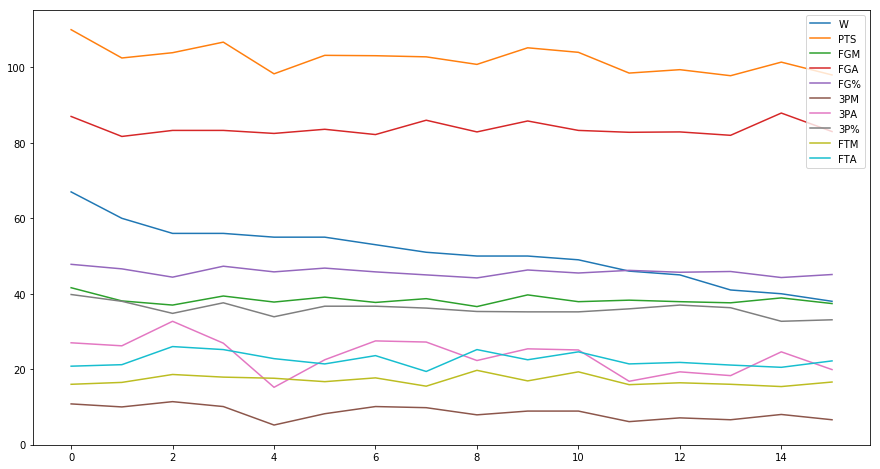

In [11]:
team_points_stats1415.plot(figsize = (15,8))

In [20]:
print ("Pearson Correlation between Wins and Average Points scored per game")
print (sc.stats.pearsonr(team_points_stats1415.W, team_points_stats1415.PTS))
print (sc.stats.pearsonr(team_points_stats1516.W, team_points_stats1516.PTS))
print (sc.stats.pearsonr(team_points_stats1617.W, team_points_stats1617.PTS))
print (sc.stats.pearsonr(team_points_stats1718.W, team_points_stats1718.PTS))

Pearson Correlation between Wins and Average Points scored per game
(0.7303714258876197, 0.0013137886619496767)
(-0.10271977650577788, 0.7050195434508446)
(0.6320520655169477, 0.008618883096595274)
(0.6007161780295456, 0.013863372825682488)


In [21]:
print ("Pearson Correlation between Wins and Field Goal shots made")
print (sc.stats.pearsonr(team_points_stats1415.W, team_points_stats1415.FGM))
print (sc.stats.pearsonr(team_points_stats1516.W, team_points_stats1516.FGM))
print (sc.stats.pearsonr(team_points_stats1617.W, team_points_stats1617.FGM))
print (sc.stats.pearsonr(team_points_stats1718.W, team_points_stats1718.FGM))

Pearson Correlation between Wins and Field Goal shots made
(0.47314465285124374, 0.0641653656188355)
(0.7328445287369332, 0.0012407012314027078)
(0.5749254164000968, 0.01981983143030025)
(0.11072083442269191, 0.6831145872238877)
